In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd

# Scan Images

In [2]:
fld_imgs = '/storage/users/g-and-n/plates_imgs'

In [ ]:
plates = os.listdir(fld_imgs)

px_max = 0
sizes = set()
for plate in plates:
    plate_fld = os.path.join(fld_imgs, plate)
    plate_imgs = os.listdir(plate_fld)
    for plate_img in tqdm(plate_imgs):
        plate_img_path = os.path.join(plate_fld, plate_img)
        img = cv2.imread(plate_img_path, flags=cv2.IMREAD_UNCHANGED)#IMREAD_GRAYSCALE)
        sizes.add(img.shape)
        px_max = max(px_max, np.max(img))
        del img

sizes, px_max

# Check Single Image

## Load metadata

In [3]:
fld_metadata = '/storage/users/g-and-n/plates/metadata'

In [4]:
plate = '24294'

In [5]:
pmt = os.path.join(fld_metadata, plate) + '.csv'
pmt 

'/storage/users/g-and-n/plates/metadata/24294.csv'

In [6]:
df_noidx = pd.read_csv(pmt)

In [7]:
df = pd.read_csv(pmt, index_col=list(range(6)))
df

AGP  \
Plate Well Site ImageNumber Well_Role Broad_Sample                                                                
24294 a01  1    1           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s1_w40fcbb11a-bd2f-476a-8a3...   
           2    2           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s2_w40452d68c-6702-4a83-941...   
           3    3           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s3_w4a4f8b9e1-dec3-4257-8b6...   
           4    4           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s4_w4db2dc16b-012a-4d2e-91e...   
           5    5           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s5_w4e1d976df-a9fa-456d-bc0...   
...                                                                                                         ...   
      p24  2    2300        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s2_w4c188a526-d4ff-4fca-b31...   
           3    2301        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s3_w46cbe67c9-83d0-418e-830...   
           4    2302        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s4_w428472c6c-4adc-452e-86f...   
           5    2303        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s5_w4cecf8411-6d27-42d9-aae...   
           6    2304        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s6_w49b5f04c2-02dd-49a8-b77...   

                                                                                                            DNA  \
Plate Well Site ImageNumber Well_Role Broad_Sample                                                                
24294 a01  1    1           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s1_w1ba89e847-e0e7-4ada-95e...   
           2    2           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s2_w1b1854fa2-4e1f-49c2-88b...   
           3    3           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s3_w1177d9d53-9135-446f-bc9...   
           4    4           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s4_w1038838e6-09f9-49ba-892...   
           5    5           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s5_w1adefdbb0-1ce1-422d-8f9...   
...                                                                                                         ...   
      p24  2    2300        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s2_w105030643-eeb4-4ad1-b71...   
           3    2301        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s3_w1a0e5de29-ed39-46da-85b...   
           4    2302        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s4_w14936e1c1-4c8e-4a56-897...   
           5    2303        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s5_w16bb308d9-cc9f-446e-99b...   
           6    2304        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s6_w17a3582ca-4ba6-49dd-97d...   

                                                                                                             ER  \
Plate Well Site ImageNumber Well_Role Broad_Sample                                                                
24294 a01  1    1           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s1_w2f5894a95-e8c1-4c5c-ae8...   
           2    2           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s2_w24ba041b9-a661-4a54-ab0...   
           3    3           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s3_w25f5e0308-2e5f-4412-a02...   
           4    4           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s4_w20d54dd63-ce7a-4e6e-b20...   
           5    5           treated   BRD-A00100033-001-04-8  cdp2bioactives_a01_s5_w290aed643-35d9-41f3-b2c...   
...                                                                                                         ...   
      p24  2    2300        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_s2_w25e7325e6-4c7f-4be1-a67...   
           3    2301        treated   BRD-A44863528-001-04-1  cdp2bioactives_p24_

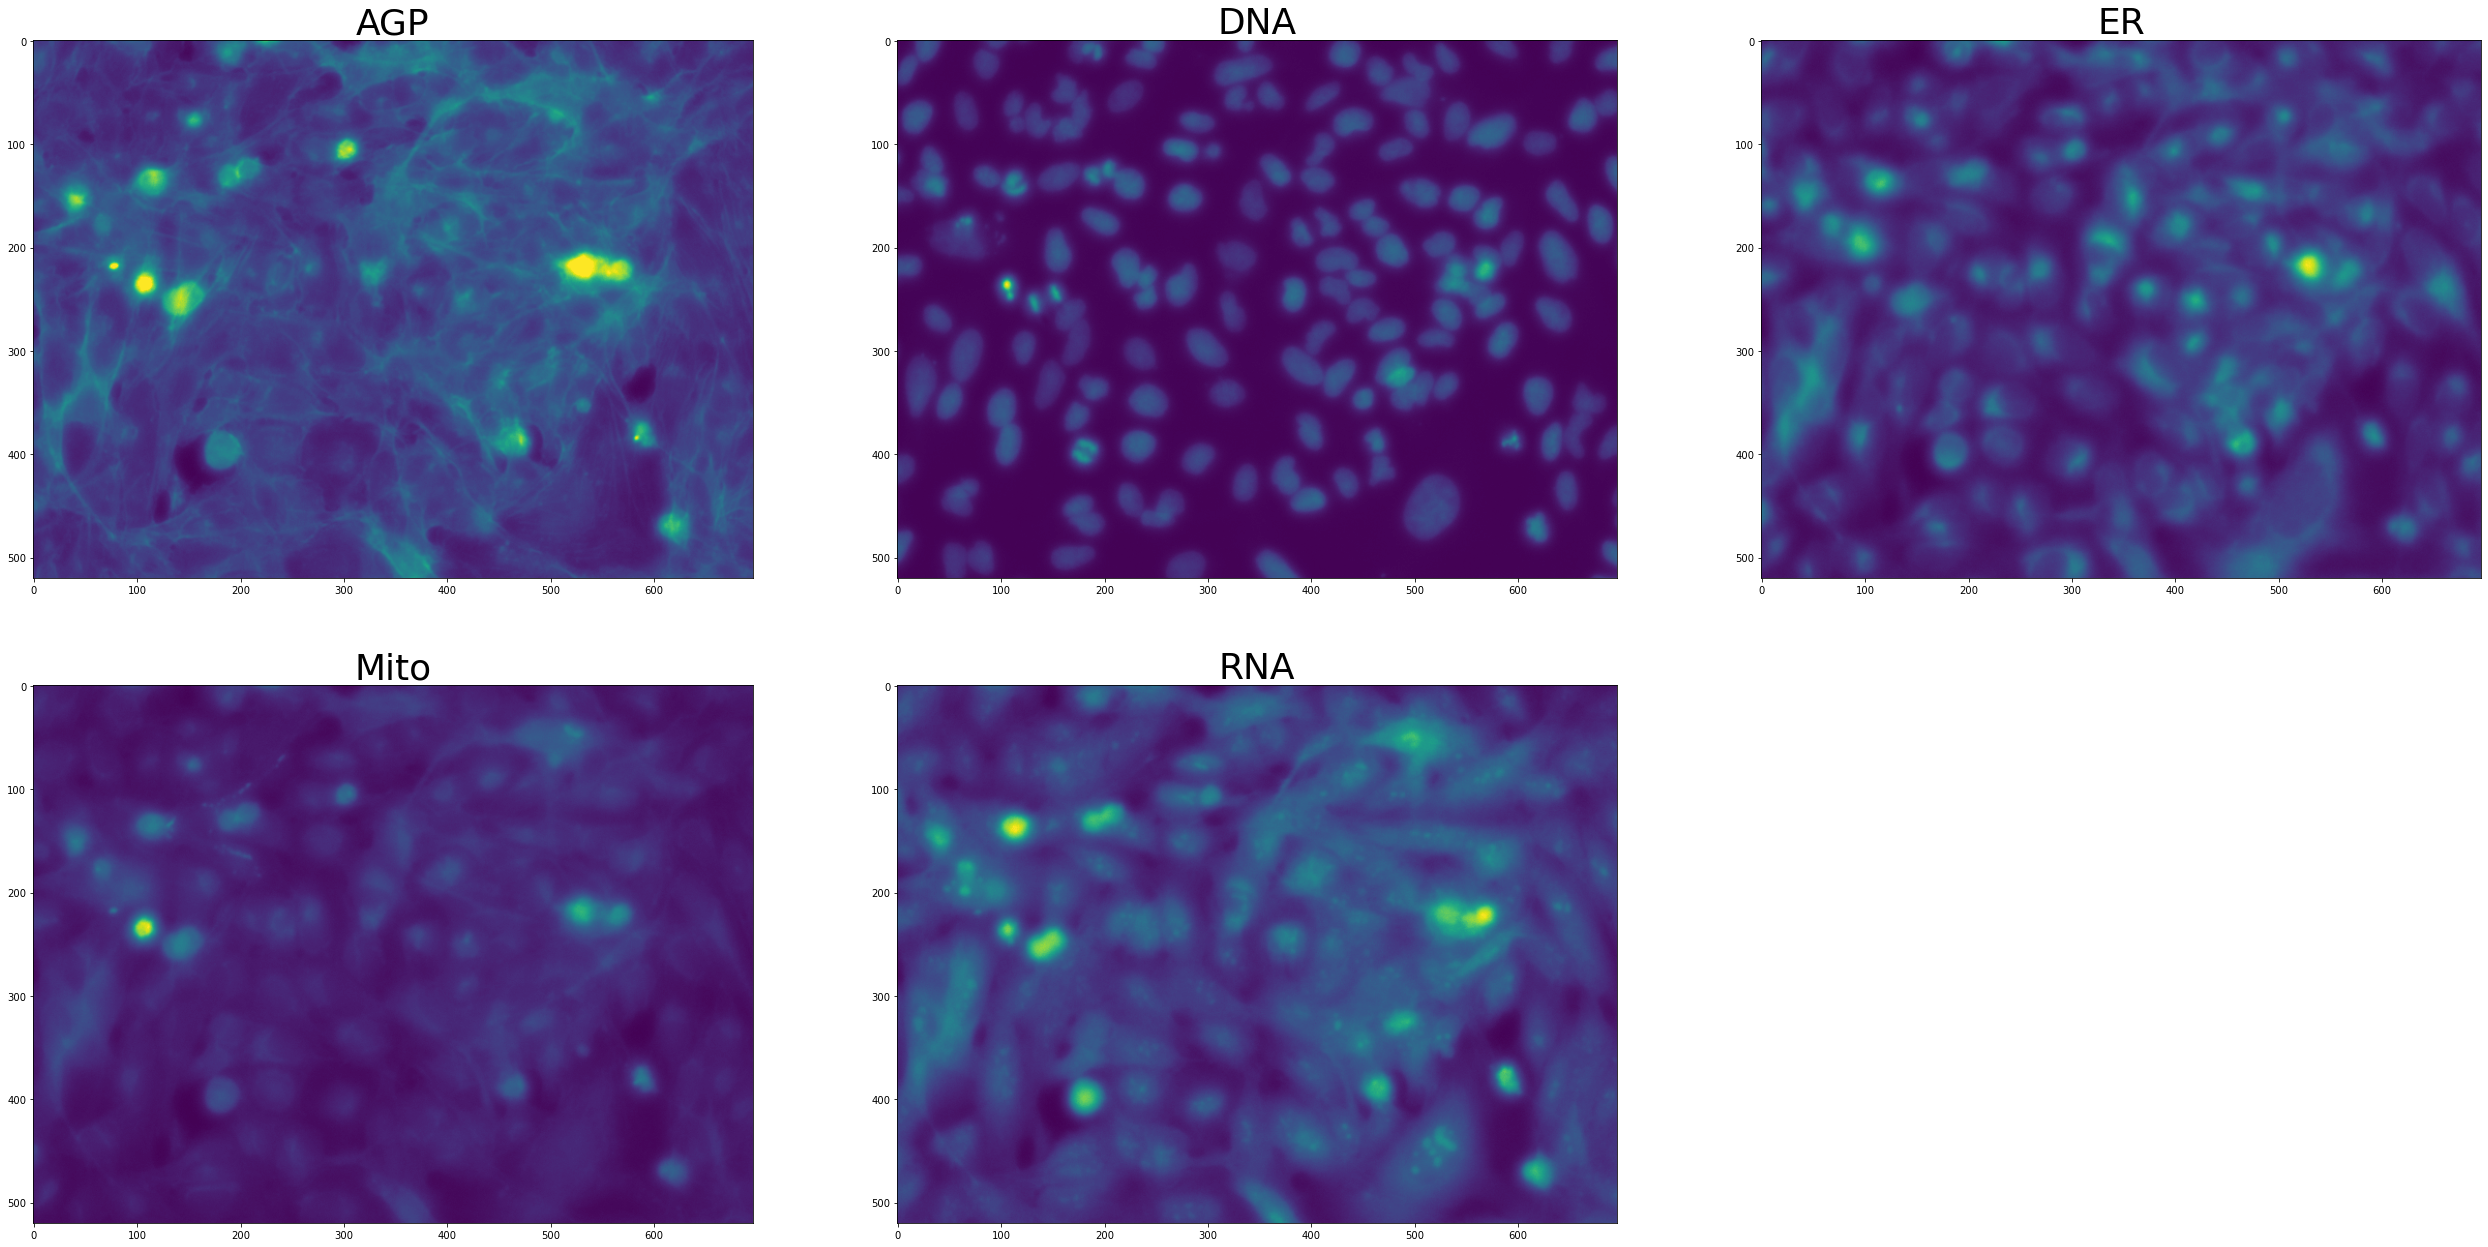

In [8]:
plate = '24294'
AGP,DNA,ER,Mito,RNA = df.iloc[0]
names = ['AGP','DNA','ER','Mito','RNA']

ncols=3
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(0.9*ncols*520/32,696/32))

for i, c in enumerate([AGP,DNA,ER,Mito,RNA]):
    c_path = os.path.join(fld_imgs, plate, c)
    img = cv2.imread(c_path, flags=cv2.IMREAD_UNCHANGED)#IMREAD_GRAYSCALE)
#     print('Mean', np.mean(img))
#     print('Std', np.std(img))
#     print('Max', np.max(img))
#     print('Min', np.min(img))
#     plt.gray()
    _ = ax[i//ncols, i%ncols].imshow(img)
    _ = ax[i//ncols, i%ncols].set_title(names[i], fontsize=36)

    
_ = ax[-1,-1].axis('off')

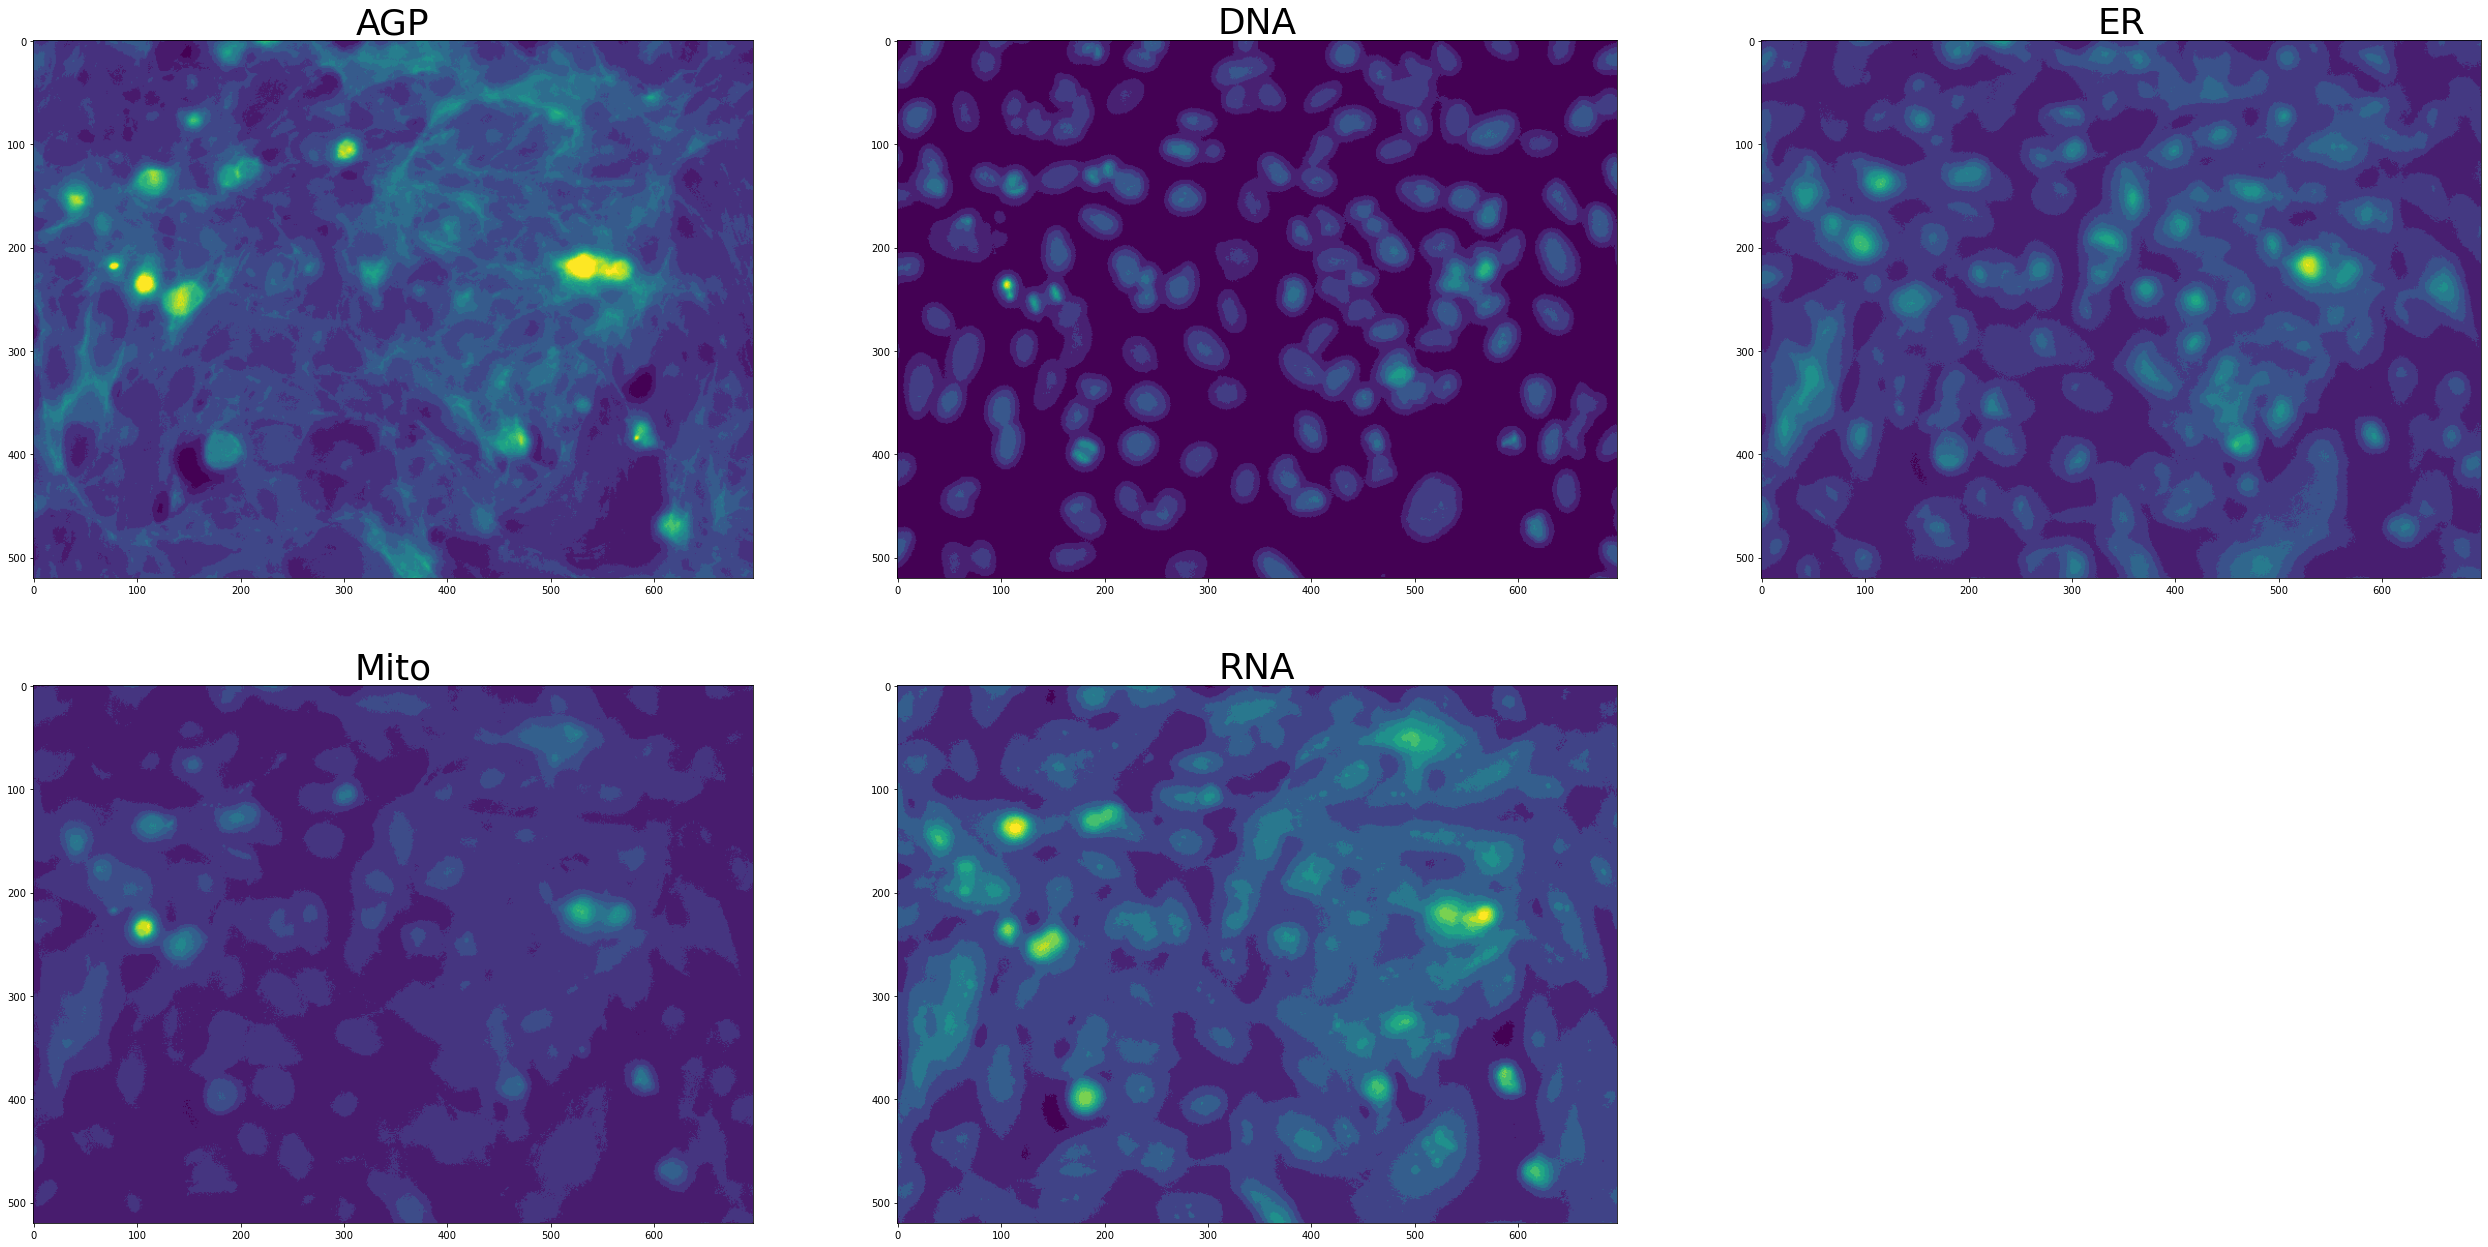

In [9]:
plate = '24294'
AGP,DNA,ER,Mito,RNA = df.iloc[0]
names = ['AGP','DNA','ER','Mito','RNA']

ncols=3
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(0.9*ncols*520/32,696/32))

for i, c in enumerate([AGP,DNA,ER,Mito,RNA]):
    c_path = os.path.join(fld_imgs, plate, c)
    img = cv2.imread(c_path, flags=cv2.IMREAD_GRAYSCALE)
#     print('Mean', np.mean(img))
#     print('Std', np.std(img))
#     print('Max', np.max(img))
#     print('Min', np.min(img))
#     plt.gray()
    _ = ax[i//ncols, i%ncols].imshow(img)
    _ = ax[i//ncols, i%ncols].set_title(names[i], fontsize=36)

_ = ax[-1,-1].axis('off')

## Check Random Crop

# Check Dataset

### import Dataset

In [10]:
import torch
from torch.utils.data import Dataset

class CovidDataset(Dataset):

    def __init__(self,
                 inds,
                 target_channel,
                 root_dir,
                 input_channels=4,
                 transform=None,
                 csv_file='metadata.csv',
                 im_shape=(520,696),
                 for_data_statistics_calc=False,
                 is_test=False):

        super(Dataset).__init__()
        self.metadata_file = pd.read_csv(os.path.join(root_dir, csv_file), index_col=list(range(6))).iloc[inds]
        self.root_dir = root_dir
        self.target_channel = target_channel
        self.input_channels = input_channels
        self.transform = transform
        self.im_shape = im_shape

        rec = self.metadata_file.iloc[0]
        sample = self.load_site(*rec.name[:3])
        self.for_data_statistics_calc = for_data_statistics_calc
        self.is_test = is_test

    def __len__(self):
        return len(self.metadata_file)

    def load_images_as_tensor(self, image_paths, dtype=np.uint8):
        n_channels = len(image_paths)
        # TODO: Use self.im_shape ?
        data = np.ndarray(shape=(*self.im_shape, n_channels), dtype=dtype)

        for ix, img_path in enumerate(image_paths):
            data[:, :, ix] = cv2.imread(img_path, flags=cv2.IMREAD_UNCHANGED)

        return data

    def image_path(self, channel, plate=None, well=None, site=None, index=None):
        """
        Returns the path of a channel image.
        Parameters
        ----------
        channel : str
            channel name
        plate : int
            plate number
        well : str
            well id
        site : int
            site number
        index : int
            well index in metadata table

        Returns
        -------
        str the path of image
        """
        if index is not None:
            metadata_row = self.metadata_file.iloc[index]
            plate = metadata_row.name[0]
            filename = metadata_row.get(channel)
        elif plate is not None and well is not None and site is not None:
            filename = self.metadata_file.loc[(plate, well, site), channel].iat[0]
        else:
            raise 'image_path, need to provide plate-well-site or index'

        # TODO: Verify Path
        return os.path.join(self.root_dir, str(plate), filename)

    def load_site(self, plate=None, well=None, site=None, index=None):
        """
        Returns the image data of a site
        Parameters
        ----------
        plate : int
            plate number
        well : str
            well id
        site : int
            site number
        index : int
            well index in metadata table
        Returns
        -------
        np.ndarray the image data of the site
        """

        input_channels = list(DEFAULT_CHANNELS)

        input_paths = [
            self.image_path(c, plate, well, site, index)
            for c in input_channels
        ]
        return self.load_images_as_tensor(input_paths)

    def __getitem__(self, idx, show_sample=False):
        inp = self.load_site(index=idx)
        if not self.for_data_statistics_calc:
            if show_sample:
                trans_input = np.zeros((inp.shape[2], inp.shape[0], inp.shape[1]))
                for i in range(5):
                    trans_input[i, :, :] = inp[:, :, i]
                show_input_and_target(trans_input, title='before transforms')
            if self.transform:
                inp = self.transform(inp)
                if show_sample:
                    show_input_and_target(inp, title='after transforms')
            if self.input_channels == 4:
                inp, target = self.split_target_from_tensor(inp, show_sample)
            elif self.input_channels == 1:
                inp, target = inp[self.target_channel - 1:self.target_channel, :, :], \
                              inp[self.target_channel - 1:self.target_channel, :, :]
            elif self.input_channels == 5:
                target = inp
            else:
                raise ValueError('Number of input channels is not supported')
            if self.is_test:
                # rec = dict_fields_to_str(rec.to_frame().to_dict()[rec.name])
                return inp, target, idx
            else:
                return inp, target
        else:
            return inp

    def split_target_from_tensor(self, inp, show_sample=False):

        num_channels = inp.shape[0]

        if self.target_channel == 1:

            target, inp = torch.split(inp, [1, num_channels - 1])
        elif self.target_channel == num_channels:
            inp, target = torch.split(inp, [num_channels - 1, 1])
        else:
            after = num_channels - self.target_channel
            before = num_channels - after - 1
            a, target, c = torch.split(inp, [before, 1, after])
            inp = torch.cat((a, c), dim=0)

        if show_sample:
            show_input_and_target(inp.detach().numpy(), target.detach().numpy(),
                                  title='after split to train and target')

        return inp, target


### Use dataset

In [11]:
DEFAULT_CHANNELS = ['AGP','DNA','ER','Mito','RNA']

In [9]:
!conda install python=3.8.6 -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::nodejs==16.5.0=h92b4a50_0
  - conda-forge/noarch::nbdime==3.1.0=pyhd8ed1ab_0
  - conda-forge/noarch::gitdb==4.0.5=py_0
  - conda-forge/noarch::gitpython==3.1.18=pyhd8ed1ab_0
  - conda-forge/noarch::jupyterlab-git==0.30.1=pyhd8ed1ab_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/naorko/.conda/envs/tf-env

  added / updated specs:
    - python=3.8.6


The following packages will be DOWNGRADED:

  python                          3.8.10-h49503c6_1_cpython --> 3.8.6-hffdb5ce_5_cpython
  smmap                                  4.0.0-pyhd8ed1ab_1 --> 3.0.5-p

In [ ]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.1 -c pytorch -y

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::nodejs==16.5.0=h92b4a50_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::nodejs==16.5.0=h92b4a50_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
\ 

In [4]:
import torch

ModuleNotFoundError: No module named 'torch'

In [ ]:
"cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from torch.utils.data import DataLoader

inds, data_dir, num_batches, device, vmax = df_noidx.index, fld_imgs, 1, torch.device("cuda" if torch.cuda.is_available() else "cpu"), 65535

train_data = CovidDataset(inds, root_dir=data_dir, target_channel=None, for_data_statistics_calc=True, csv_file=pmt)
batch_size = int(len(train_data) / num_batches)
train_loader = DataLoader(train_data, batch_size=batch_size)
num_channels = len(DEFAULT_CHANNELS)

mean = torch.zeros(num_channels).to(device)
std = torch.zeros(num_channels).to(device)

for images in train_loader:
    images = images.to(device)
    batch_mean, batch_std = torch.std_mean(images.float().div(vmax), dim=(0, 1, 2))

    mean += batch_mean
    std += batch_std

mean /= num_batches
std /= num_batches
print('mean of train data is ' + str(mean.tolist()))
print('std of train data is ' + str(std.tolist()))

mean_fin, std_fin =  mean.tolist(), std.tolist()